# JAM FITTER

In [1]:
import sys,os
from fitlab.resman import RESMAN
from fitlab.mcsamp import MCSAMP
from tools.config import load_config,conf
from tools.tools import load, save,checkdir
import pylab as py
import numpy as np
import pandas as pd
import copy
def lprint(msg):
    sys.stdout.write('\r')
    sys.stdout.write('%s' %msg)
    sys.stdout.flush()
%matplotlib inline

## setup path to store the results 

In [2]:
path2results='sidis_hermes_alexei'
checkdir(path2results)

## data sets 

In [3]:
conf['datasets']={}

## SIDIS FUU 

In [4]:
conf['datasets']['sidis']={}
conf['datasets']['sidis']['filters']={}
conf['datasets']['sidis']['filters'][0]={}
conf['datasets']['sidis']['filters'][0]['idx']=[1000,1001,1004,1005,1002,1003,1006,1007]
conf['datasets']['sidis']['filters'][0]['filter']="z>0.2 and z<0.6 and Q2>1.69 and (pT/z)**2<0.25*Q2 and dy>2.5"
#conf['datasets']['sidis']['filters'][0]['filter']="z>0.2 and z<0.6 and Q2>1."



conf['datasets']['sidis']['xlsx']={}
conf['datasets']['sidis']['xlsx'][1000]='sidis/expdata/1000.xlsx'  # |  proton   | pi+    | M_Hermes | hermes 
conf['datasets']['sidis']['xlsx'][1001]='sidis/expdata/1001.xlsx'  # |  proton   | pi-    | M_Hermes | hermes 
conf['datasets']['sidis']['xlsx'][1004]='sidis/expdata/1004.xlsx'  # |  deuteron | pi+    | M_Hermes | hermes 
conf['datasets']['sidis']['xlsx'][1005]='sidis/expdata/1005.xlsx'  # |  deuteron | pi-    | M_Hermes | hermes 

conf['datasets']['sidis']['xlsx'][1002]='sidis/expdata/1002.xlsx'  # |  proton   | k+    | M_Hermes | hermes 
conf['datasets']['sidis']['xlsx'][1003]='sidis/expdata/1003.xlsx'  # |  proton   | k-    | M_Hermes | hermes 
conf['datasets']['sidis']['xlsx'][1006]='sidis/expdata/1006.xlsx'  # |  deuteron | k+    | M_Hermes | hermes 
conf['datasets']['sidis']['xlsx'][1007]='sidis/expdata/1007.xlsx'  # |  deuteron | k-    | M_Hermes | hermes 

conf['datasets']['sidis']['norm']={}
for k in conf['datasets']['sidis']['xlsx']: conf['datasets']['sidis']['norm'][k]={'value':1,'fixed':True,'min':0,'max':1} 


## parameters

In [5]:
conf['params']={}

### PDF parameters

In [6]:
conf['params']['pdf']={}
conf['params']['pdf']['widths0 valence']  = {'value':0.32268,'fixed':False,'min':0.2,'max':3.5}
conf['params']['pdf']['widths0 sea']      = {'value':0.46650,'fixed':False,'min':0.3,'max':3.8}

In [7]:
conf['params']['ff']={}
conf['params']['ff']['widths0 pi+ fav']   = {'value':0.20764,'fixed':False,'min':0.1,'max':0.3}
conf['params']['ff']['widths0 pi+ unfav'] = {'value':0.18564,'fixed':False,'min':0.1,'max':0.3}
conf['params']['ff']['widths0 k+ fav']    = {'value':0.23880,'fixed':False,'min':0.1,'max':0.4}
conf['params']['ff']['widths0 k+ unfav']  = {'value':0.11432,'fixed':False,'min':0.05,'max':0.4}


## Nested Sampling

### initialize fitpack libraries

In [8]:
conf['resman'] = RESMAN()
mcsamp=MCSAMP()

loading sidis data sets 1007
multiprocess setup: ncpus=1 / observable


## Single Fit

In [11]:
from fitlab.maxlike import ML
from qcdlib.aux import AUX
from fitlab.parman import PARMAN
conf['parman'] = PARMAN()
conf['aux']=AUX()
ML().run_minimize()

JAM FITTER
count = 1
elapsed time(mins)=0.000375
shifts  = 0
npts    = 417
chi2    = 5293.483714
rchi2   = 0.000000
nchi2   = 0.000000
chi2tot = 5293.483714
dchi2(iter)  = 0.000000
dchi2(local) = -inf

reaction: sidis
    idx        tar        had        col        obs  npts       chi2      rchi2      nchi2
   1000     proton        pi+     hermes   M_Hermes    60    1724.99       0.00       0.00
   1001     proton        pi-     hermes   M_Hermes    60     636.64       0.00       0.00
   1002     proton         k+     hermes   M_Hermes    44     314.63       0.00       0.00
   1003     proton         k-     hermes   M_Hermes    44      22.08       0.00       0.00
   1004   deuteron        pi+     hermes   M_Hermes    60    1168.80       0.00       0.00
   1005   deuteron        pi-     hermes   M_Hermes    60    1256.88       0.00       0.00
   1006   deuteron         k+     hermes   M_Hermes    45      56.43       0.00       0.00
   1007   deuteron         k-     hermes   M_Hermes   

KeyError: 'args'

### start multiple NS runs
- the code will start n independent runs specified by size

In [15]:
conf['size']=10
conf['factor']=4 # play with the factor (3,4) and the tolerance (1.e-5,1.e-10)
conf['tol']=1e-10
mcsamp.run(path2results)

iter=840  logz=-376.780 rel-err=9.515e-11  t-elapsed=9.564e+01  dchi2min=7.288e+02 dchi2max=7.288e+02

### combine multiple runs into one big run

In [16]:
MC=mcsamp.get_MC_samples(path2results+'/mcdata')

runs max likelihoods
8916.33083771
8875.17858303
344.212714798
344.212715041
344.212714866
344.212714967
344.212714918
344.212714834
344.212714937
344.212714951
344.212715027
344.212714956
8870.28367732
5306.53071206
5299.12307589
5299.72782432
5303.60718057
5302.61909379
5304.40278335
5319.58670554
5317.4585243
5298.34787692
5299.88754704
8870.43509582
362.977137806
362.977137789
362.977137678
362.97713779
362.977137843
362.97713766
364.399966627
362.977137689
362.977137861
362.977137783
8896.79578305
8874.90455999
8871.82486467
8870.95488894
8872.66226269
8915.87096908
sample  size= 31492
sample2 size= 2565


### distribution of parameters

     widths0 valence =    0.85354 +/-    0.00809
         widths0 sea =    0.80800 +/-    0.03373
     widths0 pi+ fav =    0.46767 +/-    0.24059
   widths0 pi+ unfav =    0.44814 +/-    0.23791
      widths0 k+ fav =    0.49094 +/-    0.23084
    widths0 k+ unfav =    0.49682 +/-    0.23528


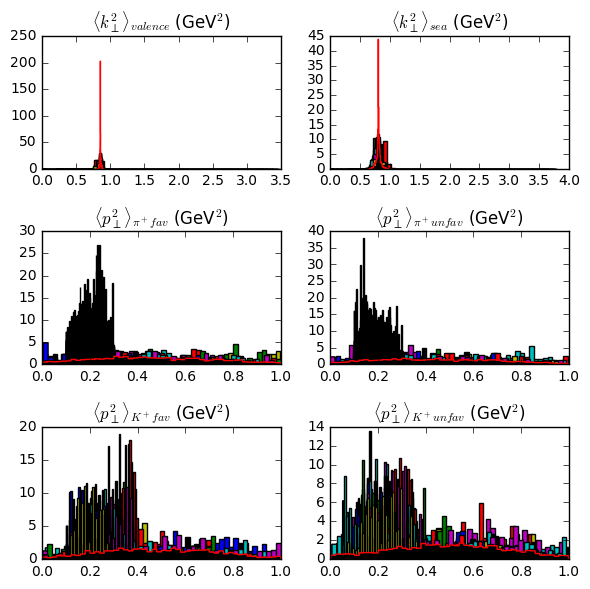

In [17]:
samples=MC['samples']
samples2=MC['samples2']
weights=MC['weights']
weights2=MC['weights2']
order=MC['order']
runs=MC['runs']

nrows,ncols=3,2
fig = py.figure(figsize=(ncols*3,nrows*2))

def get_idx(key,tag):
    for i in range(len(order)):
        if order[i][1]==key and order[i][2]==tag:
            return i

def title(tags,i):
    if tags[i] == 'widths0 valence':
        return r"$\langle k_\perp^2 \rangle_{valence}$ (GeV$^2$)"
    if tags[i] == 'widths0 sea':
        return r"$\langle k_\perp^2 \rangle_{sea}$ (GeV$^2$)"
    if tags[i] == 'widths0 pi+ fav':
        return r"$\langle p_\perp^2 \rangle_{\pi^+ fav}$ (GeV$^2$)"
    if tags[i] == 'widths0 pi+ unfav':
        return r"$\langle p_\perp^2 \rangle_{\pi^+ unfav}$ (GeV$^2$)"
    if tags[i] == 'widths0 k+ fav':
        return r"$\langle p_\perp^2 \rangle_{K^+ fav}$ (GeV$^2$)"
    if tags[i] == 'widths0 k+ unfav':
        return r"$\langle p_\perp^2 \rangle_{K^+ unfav}$ (GeV$^2$)"




        
        
        
global cnt
cnt=0
def plot(tags,name = None):
    global cnt
    for i in range(1,len(tags)):
        cnt+=1
        if tags[i]==None: continue
        idx=get_idx(tags[0],tags[i])
        ax=py.subplot(nrows,ncols,cnt)
        vmin=np.amin(samples2.T[idx])
        vmax=np.amax(samples2.T[idx])
        R=None#(vmin,vmax)
        for k in runs:
            ax.hist(runs[k]['samples'].T[idx],weights=runs[k]['weights'],bins=50,normed=True,range=R)
        ax.hist(samples.T[idx],weights=weights,bins=50,color='k',normed=True,range=R)
        ax.hist(samples2.T[idx],weights=weights2,bins=50,color='r',histtype='step',normed=True,range=R)
        #ax.set_title(tags[i])
        ax.set_title(title(tags,i))
        mean=np.einsum('i,i',samples2.T[idx],weights2)
        std=np.einsum('i,i',(samples2.T[idx]-mean)**2,weights2)**0.5
        print '%20s = %10.5f +/- %10.5f'%(tags[i],mean,std)
        #ax.set_xlim(vmin,vmax)
    py.tight_layout()
    if name: py.savefig(name)

plot(['pdf','widths0 valence','widths0 sea'],"kperp_hermes.pdf")
plot(['ff','widths0 pi+ fav','widths0 pi+ unfav'],"pperp_pi_hermes.pdf")
plot(['ff','widths0 k+ fav','widths0 k+ unfav'],"pperp_k_hermes.pdf")


## data vs theory

In [18]:
data={'weights':MC['weights2']}
cnt=0
for s in MC['samples2']:
    cnt+=1    
    lprint('%d/%d'%(cnt,len(MC['samples2'])))  
    conf['resman'].get_residuals(s);
    for k in conf['resman'].sidisres.tabs:
        if k  not in data: data[k]=[]
        thy=conf['resman'].sidisres.tabs[k]['thy']    
        norm=conf['datasets']['sidis']['norm'][k]['value']
        shift=conf['resman'].sidisres.tabs[k]['shift']        
        data[k].append(shift+thy/norm)
save(data,'%s/%s'%(path2results,'sidis.dat'))   

2565/2565

### compute averages and collect results

In [14]:
data=load('%s/%s'%(path2results,'sidis.dat'))   
for k in data: data[k]=np.array(data[k])
thy,dthy={},{}
for k in data:
    if k=='weights': continue
    thy[k]=np.einsum('i,ik->k',data['weights'],data[k])
    dthy[k]=np.einsum('i,ik->k',data['weights'],(data[k]-thy[k])**2)**0.5
for k in thy: 
    conf['resman'].sidisres.tabs[k]['thy']=copy.copy(thy[k])
    conf['resman'].sidisres.tabs[k]['dthy']=copy.copy(dthy[k])

In [15]:
report=conf['resman'].gen_report(verb=0,level=1)
delimiters=[]
for i in range(len(report)): 
    if 'reaction:' in report[i]: delimiters.append(i) 

data={}
nlines=len(report)
for i in range(len(delimiters)):
    ini=delimiters[i]
    if i==len(delimiters)-1: fin=len(report)
    else: fin=delimiters[i+1]
    reaction=report[ini].replace('reaction:','').strip()
    data[reaction]={'raw data':report[ini:fin]}
    
for k in data:
    print k
    block=data[k]['raw data']
    isep=[i for i in range(len(block)) if '--------' in block[i]][0]
    data[k]['summary']=[block[i] for i in range(isep)]
    data[k]['tables']=[block[i] for i in range(isep+1,len(block))]

    tabs={}
    for l in data[k]['tables']:
        info=l.split(',')
        col=[s for s in info if 'col' in s][0].split('=')[1].strip()
        if col not in tabs: tabs[col]={}
        info=[[ss.strip() for ss in s.split('=')] for s in info if 'col' not in info  if s.strip()!='']
        
        for s in info:
            if s[0] not in tabs[col]: tabs[col][s[0]]=[]
        
        for s in info:
            try:
                value=float(s[1])
            except:
                value=s[1]
            tabs[col][s[0]].append(value)        

    data[k]['tabs']=tabs
save(data,'%s/%s'%(path2results,'data_and_thy.dat'))  

In [33]:
def summary():
    for k in data:
        print ""
        for l in data[k]['summary']: print l
summary()

In [21]:
report

['sidis',
 u'   1000     proton        pi+     hermes   M_Hermes    45      77.39       0.00       0.00',
 u'   1001     proton        pi-     hermes   M_Hermes    45      88.50       0.00       0.00',
 u'   1002     proton         k+     hermes   M_Hermes    46      66.80       0.00       0.00',
 u'   1003     proton         k-     hermes   M_Hermes    46      20.98       0.00       0.00',
 u'   1004   deuteron        pi+     hermes   M_Hermes    45      59.56       0.00       0.00',
 u'   1005   deuteron        pi-     hermes   M_Hermes    45      59.37       0.00       0.00',
 u'   1006   deuteron         k+     hermes   M_Hermes    46      22.17       0.00       0.00',
 u'   1007   deuteron         k-     hermes   M_Hermes    45      61.40       0.00       0.00',
 '----------------------------------------------------------------------------------------------------',
 u'col= hermes  obs=M_Hermes  x= 9.574e-02  z= 2.238e-01  pT= 1.015e-01  Q2= 1.821e+00  exp= 1.819e+00  alpha= 7.643e

### plot data and theory

In [18]:
data=load('%s/%s'%(path2results,'data_and_thy.dat'))

In [20]:
data

{}

### 1000

In [19]:
tab=pd.DataFrame(data['sidis']['tabs']['hermes']).query('idx==1000')
tab['xr']=[np.round(x,2) for x in tab.x]
ZR=[[0.1,0.2],[0.2,0.25],[0.25,0.3],[0.3,0.4],[0.4,0.5],[0.5,1]]

nrows,ncols=1,2
fig = py.figure(figsize=(ncols*3,nrows*3))
ax=py.subplot(nrows,ncols,1)
ax.plot(tab['x'],tab['Q2'],'.'); ax.set_xlabel(r'$x$',size=20); ax.set_ylabel(r'$Q^2$',size=20)
ax=py.subplot(nrows,ncols,2)
ax.plot(tab['pT'],tab['z'],'.'); ax.set_xlabel(r'$p_T$',size=20); ax.set_ylabel(r'$z$',size=20);
for zr in ZR: ax.axhline(y=zr[0]);
py.tight_layout()

KeyError: 'sidis'

In [35]:
nrows,ncols=6,6
fig = py.figure(figsize=(ncols*3,nrows*2))
cnt=0
for xr in np.unique(tab['xr']):
    tabx=tab.query('xr==%f'%xr)
    for zr in ZR:
        tabz=tabx.query('z>%f and z<%f'%(zr[0],zr[1]))
        cnt+=1
        ax=py.subplot(nrows,ncols,cnt)
        ax.errorbar(tabz['pT'],tabz['exp'],yerr=tabz['alpha'],fmt='k.')
        ax.fill_between(tabz['pT'],tabz['thy']-tabz['dthy'],tabz['thy']+tabz['dthy'])
        
py.tight_layout()

NameError: name 'tab' is not defined

In [39]:
pwd

u'/Users/avp5627/GIT/TMD-PHENO-REPOS/fitpack/fitlab/notebooks'

In [27]:
from plotter import Plotter
from matplotlib import rc
import matplotlib.pyplot as plt

rc("font", **{"family": "sans-serif", "sans-serif": ["Helvetica"]})

#conf = load_config("../fitlab/inputs/upol_hermes_noevolution.py")

#conf["resman"] = RESMAN(conf)
#conf["resman"].get_residuals(conf["parman"].par)



x_bins = [0.023, 0.047, 0.075, 0.12, 0.2, 0.35, 0.6]
q2_bins = [1.0, 15.0]



raw = pd.read_excel('../database/sidis/expdata/1002.xlsx')

data = pd.concat(pd.DataFrame(d)
                 for d in conf["resman"].sidisres.tabs.values())

data = data[(data["hadron"] == "k+") &
            (data["target"] == "proton")]

z_bin_edges = [0.1 , 0.2 , 0.25 , 0.3 , 0.375 , 0.475 , 0.6 , 0.8 , 1.1]
z_bins = list(zip(z_bin_edges[:], z_bin_edges[1:]))

def z_func(z):
    for k, (zmin, zmax) in enumerate(z_bins):
        if (z <= zmax) and ((zmin < z) or (k == 0 and zmin <= z)):
            return k

z_ids = tuple(range(8))

z_labs = {
    0: r"$z \in \left[ 0.1, 0.2 \right]$",
    1: r"$z \in \left( 0.2, 0.25 \right]$",
    2: r"$z \in \left( 0.25, 0.3 \right]$",
    3: r"$z \in \left( 0.3, 0.375 \right]$",
    4: r"$z \in \left( 0.375, 0.475 \right]$",
    5: r"$z \in \left( 0.475, 0.6 \right]$",
    6: r"$z \in \left( 0.6, 0.8 \right]$",
    7: r"$z \in \left( 0.8, 1.1 \right]$"
}

raw["qT"] = raw["pT"] / raw["z"]
data["qT"] = data["pT"] / data["z"]

col_lab = "pT"
sub_xlabel = r"$p_T$ (GeV)"

big_xlabel = "$x$"
big_ylabel = "$Q^2$"

title = "HERMES"

sub_ylabel = r"$M_{D}^{\pi^+}$"

fig_kw = {"figsize": (13, 13)}

plotter = Plotter(raw=raw,
                  data=data,
                  col_lab=col_lab,
                  q2_bins=q2_bins,
                  x_bins=x_bins,
                  z_func=z_func,
                  z_ids=z_ids,
                  z_labs=z_labs,
                  sub_xlabel=sub_xlabel,
                  sub_ylabel=sub_ylabel,
                  big_xlabel=big_xlabel,
                  big_ylabel=big_ylabel,
                  title=title,
                  fig_kw=fig_kw
                  )

plotter.raw_plot_kw["alpha"] = 0.4
 
plotter.raw_plot_kw["markersize"] = 2
plotter.raw_plot_kw["linewidth"] = 2

plotter.data_plot_kw["alpha"] = 1.0
plotter.data_plot_kw["markersize"] = 2.4
plotter.data_plot_kw["linewidth"] = 2
plotter.data_plot_kw["markeredgecolor"] = (0.8392156862745098,
                                           0.15294117647058825,
                                           0.1568627450980392)  # To increase visibility
plotter.data_plot_kw["markeredgewidth"] = 0.16

plotter.legend_kw["bbox_to_anchor"] = (0.9 / plotter.ncols, 1 - 0.5 / plotter.nrows)
plotter.legend_kw["loc"] = "center"

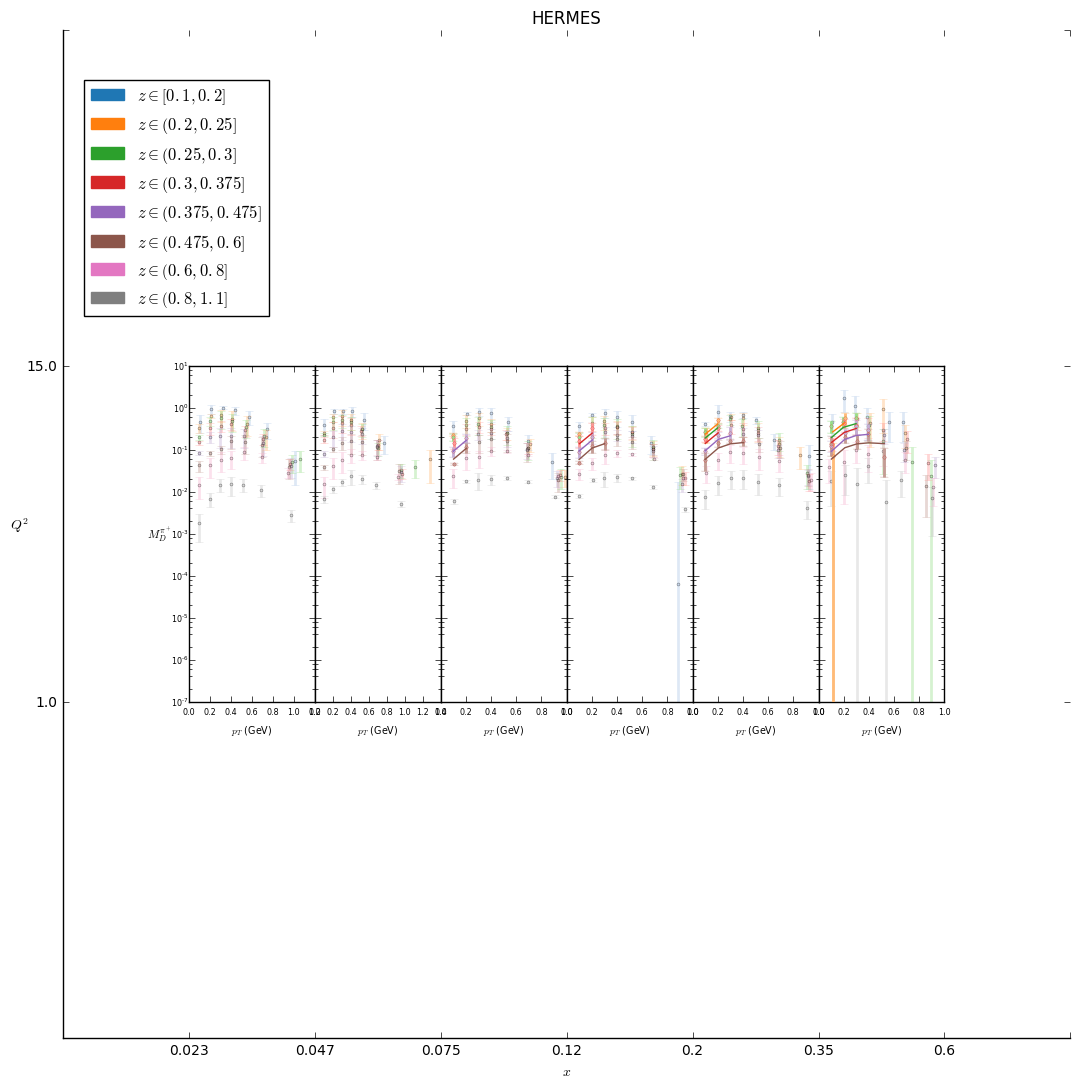

In [28]:
plotter.plot()

In [16]:
from matplotlib import rc
rc("font", **{"family": "sans-serif", "sans-serif": ["Helvetica"]})


data = pd.concat(pd.DataFrame(d)
                 for d in conf["resman"].sidisres.tabs.values())

data = data[(data["hadron"] == "pi+") &
            (data["target"] == "proton")]

In [17]:
#####################
# reading the data ##
#####################
#dat=pd.read_excel('E:/Laptop/School/Interships/Dr_Prokudin/Juniper82/PHYS296/dat/expdat/1000.xlsx');
#dat=pd.read_excel('C:/Users/Dolam/Documents/Scott/1000.xlsx');
dat=pd.read_excel('../database/sidis/expdata/1000.xlsx');

In [18]:
######################
# Calculated values ##
######################
dat["delta"] = np.sqrt(dat["stat_u"]**2.0) # measurment error

data["delta"] = np.sqrt(data["stat_u"]**2.0) # measurment error

In [19]:
##################
## Binning data ##
##################
# data bin edeges

xBin=np.array([0.023,0.047,0.075,0.12,0.35,0.6]) # Bins for x used to plot Pt
Q2Bin=np.array([1.0,10]) # **NOTE** includes all Q2 data, therefore all value data is plotted vs. Pt
zBin= np.array([0.1, 0.2,0.25,0.3, 0.375, 0.475, 0.6, 0.8, 1.1]) # catagories for z to be ploted indiviualy in each subplot

# binning data
dat['xBin'] = pd.cut(dat['x'], xBin,labels = False, retbins=0)
dat['Q2Bin'] = pd.cut(dat['Q2'], Q2Bin,labels = False, retbins=0)
dat['zBin'] = pd.cut(dat['z'], zBin,labels = False, retbins=0)

data['xBin'] = pd.cut(data['x'], xBin,labels = False, retbins=0)
data['Q2Bin'] = pd.cut(data['Q2'], Q2Bin,labels = False, retbins=0)
data['zBin'] = pd.cut(data['z'], zBin,labels = False, retbins=0)

# bins for x and y that have non-empty intersection
pTdatmod=[0,1,2,3,4] # xBins that overlap Q2Bins
valuedatmod=[0] # Q2bins that overlap xBins

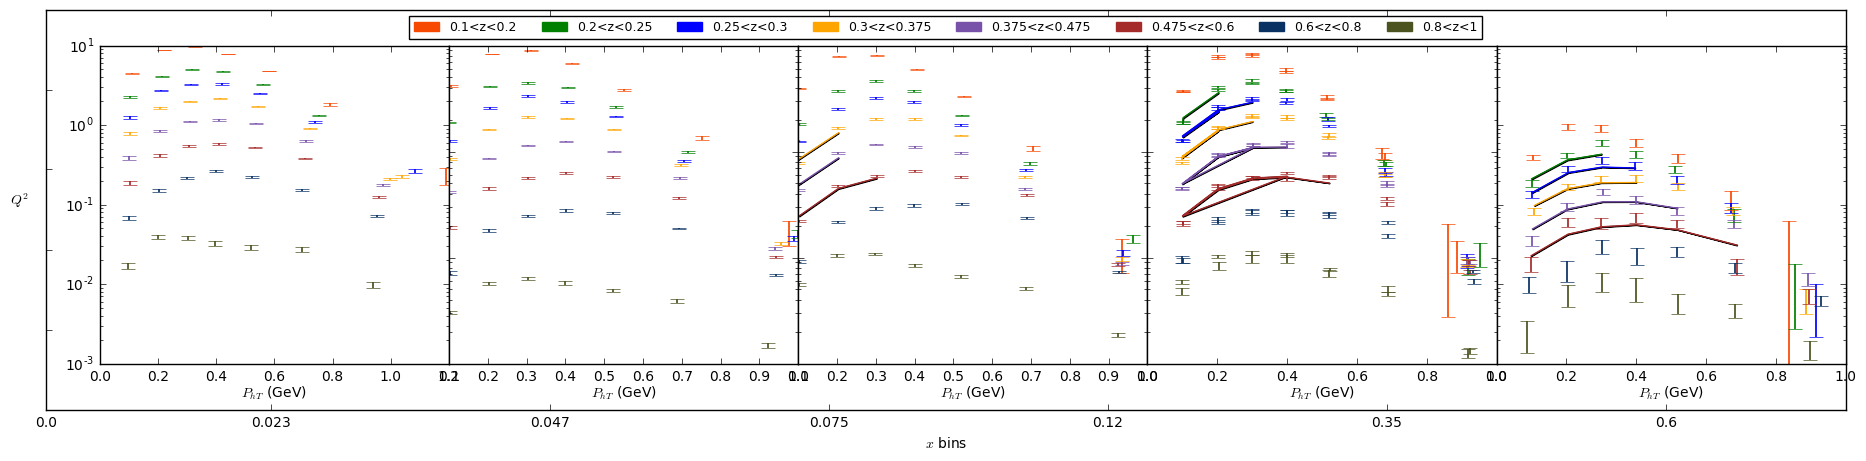

In [20]:
###############
# HermesPlot ##
###############  Reduced matix 
# initialize the figure
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib.backends.backend_pdf import PdfPages

fig1=plt.figure(figsize=(18, 4),facecolor="white") # figsize; wxh in inche
globalGrid=gridspec.GridSpec(1, 1,left=0.03,right=1,top=.91,bottom=.115, wspace=0.0, hspace=0.0) # plot for subplot matrix as 1x1 matrix
innerGrid=gridspec.GridSpecFromSubplotSpec(1,5 , subplot_spec=globalGrid[0], wspace=0.0, hspace=0.0) # 5x6 subplot grid 

# figure properties:
ax=fig1.add_axes([0,0,1,1]) # axas for subplot matrix as percent of hole
#ax.yaxis.set_ticks([0,1.25,2.76,4.27,5.78,7.29,8.8,10])
ax.xaxis.set_ticks([0,1.25,2.8,4.35,5.9,7.45,9,10 ])
xticklabels = np.array([0,0.023,0.047,0.075,0.12,0.35,0.6]) 

ax.set_yticklabels("")
ax.set_xticklabels(xticklabels)
ax.set_xlabel(r"$x$ bins") # xy-lables
ax.set_ylabel(r"$Q^2$",rotation="horizontal",labelpad = 15)
#ax.grid() # grid currently off

# subplot axis proerties (unused)
Zcolor=['#F74902',"green","blue",'orange',"#7851a9","brown",'#093162','#4b5320']
Zmark=["o","o","o","o"]

# Set legend
Zpatch1 = mpatches.Patch(color=Zcolor[0], label='0.1<z<0.2')
Zpatch2 = mpatches.Patch(color=Zcolor[1], label='0.2<z<0.25')
Zpatch3 = mpatches.Patch(color=Zcolor[2], label='0.25<z<0.3')
Zpatch4 = mpatches.Patch(color=Zcolor[3], label='0.3<z<0.375')
Zpatch5 = mpatches.Patch(color=Zcolor[4], label='0.375<z<0.475')
Zpatch6 = mpatches.Patch(color=Zcolor[5], label='0.475<z<0.6')
Zpatch7 = mpatches.Patch(color=Zcolor[6], label='0.6<z<0.8')
Zpatch8 = mpatches.Patch(color=Zcolor[7], label='0.8<z<1')
          
ax.legend(handles=[Zpatch1,Zpatch2,Zpatch3,Zpatch4,Zpatch5,Zpatch6,Zpatch7,Zpatch8],
          loc='upper center',
          ncol=8,prop={'size': 9}
          )
          
for f,F in zip(range(len(pTdatmod)),pTdatmod):       
    for j,J in zip(range(len(valuedatmod)),valuedatmod):
        
        k = int(f) # kth possition for subplot on innerGrid matrix
        maskX = dat['xBin'].isin([F]) # returns boolean for all Jth xBin in dat  
        maskY = dat['Q2Bin'].isin([J]) # returns boolean for all Fth Q2Bin in dat
        
        maskX_thr = data['xBin'].isin([F]) # returns boolean for all Jth xBin in dat  
        maskY_thr = data['Q2Bin'].isin([J]) # returns boolean for all Fth Q2Bin in dat
       
        ax = fig1.add_subplot(innerGrid[k]) # add subplot in innerGrid
        xydat = dat[maskX & maskY] # subset of data for Jth xBin and Fth Q2Bin
        
        xydata = data[maskX_thr & maskY_thr] # subset of data for Jth xBin and Fth Q2Bin
        
        for z in range(len(zBin)-1): 
            maskZ = xydat["zBin"].isin([z])
            databin = xydat[maskZ]
            
            maskZ_thr = xydata["zBin"].isin([z])
            databin_thr = xydata[maskZ_thr]
            
            if f != 0:
                ax.errorbar(databin['pT'],databin['value'],yerr=databin['delta'],capsize=5,linestyle="",color = Zcolor[z],elinewidth=1.25)
                ax.set_xlabel(r"$p_T$ (GeV)",labelpad=1)
                ax.set_yscale('log')
                ax.set_yticklabels('')
                
                ax.plot(databin_thr['pT'],databin_thr['thy'],linestyle="-",color = Zcolor[z]) # theory
                ax.fill_between(databin_thr['pT'],databin_thr['thy']-databin_thr['dthy'],databin_thr['thy']+databin_thr['dthy']) # theory error
                ax.set_xlabel(r"$P_{hT}$ (GeV)",labelpad=1)
                ax.set_yticklabels('')
               
            else:
                ax.errorbar(databin['pT'],databin['value'],yerr=databin['delta'],capsize=5,linestyle="", color = Zcolor[z],elinewidth=1.25)
                
                ax.plot(databin_thr['pT'],databin_thr['thy'],linestyle="-",color = Zcolor[z]) #theory
                ax.fill_between(databin_thr['pT'],databin_thr['thy']-databin_thr['dthy'],databin_thr['thy']+databin_thr['dthy']) # theory error

                
                ax.set_xlabel(r"$P_{hT}$ (GeV)",labelpad=1)
                ax.set_yscale('log')
plt.savefig("hermes_fit.pdf")                